## This notebook shows how to use tensor SVD to denoise high-dimensional STEM data
1. A cropped atomic-resolution multislice simulated 4D STEM data with Poisson noise included is used as an example.
2. Besides numpy, matplotlib, time, and scipy package that will be directly used in this notebook, hyperspy needs to be installed as the tensor_svd_denoise function used the truncated matrix svd implemented in hyperspy.
3. We are hoping that tensor SVD will be part of the hyperspy package, and users will be able to run tensor SVD with exact the same way that is shown in this notebook but only call functions with a different name.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensor_svd_denoise import scree_plots, tensor_svd_denoise, weighted_tensor
import time

## Step 1: Load the test data
A multislice simulated Si [110] edge dislocation core with cropped k-space is used to explain how to use tensor SVD. Here we are going to load both the data with Poisson noise and the underground truth. The input data for tensor SVD should be rearranged to a __3D array__.

<br>If a 4D array is used as input, the __last two dimensions__ will be unfolded into one single dimension then apply tensor SVD on the new 3D tensor.

<br>The data has 114 x 114 px along the real space dimensions, and 100 px along reciprocal space dimension, which is unfolded from a 10 x 10 px patch in reciprocal space covering about 5 x 5 mrad area.

<br>The real space slice from one single reciprocal space pixel roughly shows the position of each Si dumbbell.

Data shape: (114, 114, 100)


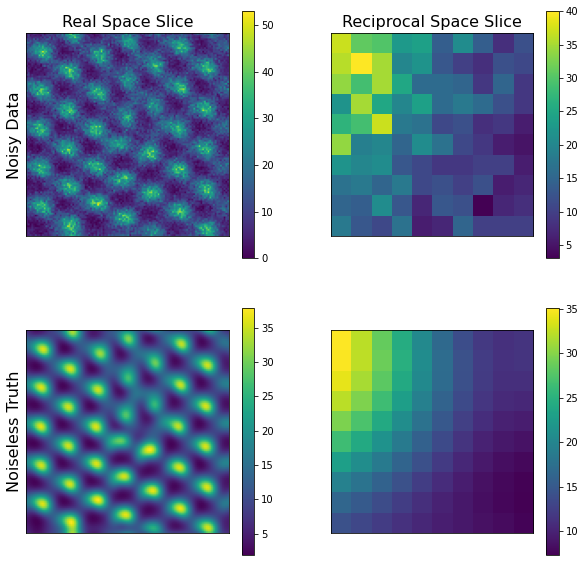

In [5]:
# Load noisy data and noiseless truth
data_noisy = np.load('Simulation_noisy_SiDisl_slice_5_1000FPS_cropped_100layers.npy')
data_truth = np.load('Simulation_truth_SiDisl_slice_5_1000FPS_cropped_100layers.npy')

print('Data shape: '+str(data_noisy.shape))

# Plot real space slice and reciprocal space slice for both noisy data and noiseless truth
fig = plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(data_noisy[:,:,10])
plt.title('Real Space Slice',fontsize = 16)
plt.ylabel('Noisy Data', fontsize = 16)
plt.colorbar()
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(data_noisy[10,10,:].reshape(10,10))
plt.title('Reciprocal Space Slice',fontsize = 16)
plt.colorbar()
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.imshow(data_truth[:,:,10])
plt.ylabel('Noiseless Truth', fontsize = 16)
plt.colorbar()
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.imshow(data_truth[10,10,:].reshape(10,10))
plt.colorbar()
plt.xticks([])
plt.yticks([])

plt.show()

## Step2: Call scree_plots function to estimate denoising ranks
This step determine the denoising ranks using scree plots adopted from matrix SVD on 2D matrices unfolded from 3D tensor along each dimension.

Following the convention in matrix SVD, the point where the scree curve __just reach the linear portion__ will be used as the denoising rank along this dimension

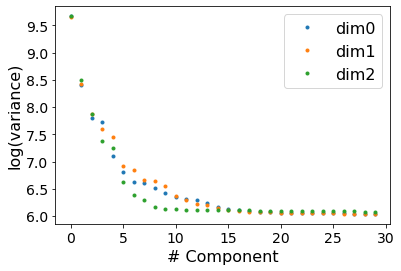

In [6]:
# Define the number of components that will be returned from scree_plots function, if ndim is not defined, ncomponents along
# each dimension will be set to the full size of that dimension
ndim = [100,100,100]
scree = scree_plots(data_noisy,ndim)

# Plot the first 30 components along each dimension in log scale

for i in range(len(scree)):
    plt.plot(np.log(scree[i][0:30]),'.',linewidth = 4, label = 'dim' + str(i))
plt.legend(fontsize=16)
plt.xlabel('# Component', fontsize=16)
plt.ylabel('log(variance)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In this example, the denoising rank to use along three dimensions are determined to be __[15, 15, 8]__ from three scree curves.

## Step3: call tensor_svd_denoise with pre-determined ranks to denoise the data

Time elapsed: 0.91 sec.
SVD finished.


([], <a list of 0 Text major ticklabel objects>)

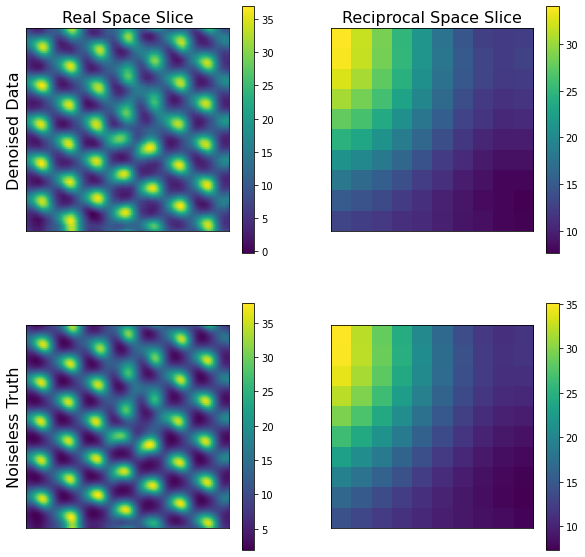

In [4]:
# Call tensor SVD using pre-determined ranks and a timer
start = time.time()
rank = [15,15,8]
# data_denoised = tensor_svd_denoise(data_noisy,rank)
data_denoised = tensor_svd_denoise(data_noisy_weighted, rank)
# Optional: transform back using the previously saved weights.
data_denoised,_ = weighted_tensor(data_denoised, weights , 1)
end = time.time()
print('Time elapsed: '+ "{:.2f}".format(end-start) +' sec.')
print('SVD finished.')

# Plot the denoised result next to ground truth
fig = plt.figure(figsize=(10,10))

plt.subplot(221)
plt.imshow(data_denoised[:,:,10])
plt.title('Real Space Slice',fontsize = 16)
plt.ylabel('Denoised Data', fontsize = 16)
plt.colorbar()
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(data_denoised[10,10,:].reshape(10,10))
plt.title('Reciprocal Space Slice',fontsize = 16)
plt.colorbar()
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.imshow(data_truth[:,:,10])
plt.ylabel('Noiseless Truth', fontsize = 16)
plt.colorbar()
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.imshow(data_truth[10,10,:].reshape(10,10))
plt.colorbar()
plt.xticks([])
plt.yticks([])

In [21]:
temp = weights[0]
len(temp)

114